<a href="https://colab.research.google.com/github/imprincesarraf/imprincesarraf/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.shape

(1338, 7)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features

1.sex
2.smoker
3.region

In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


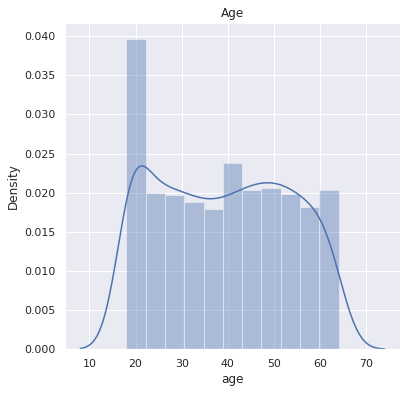

In [43]:
#Distribution of age value
#(Distribution plot)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age')
plt.show()

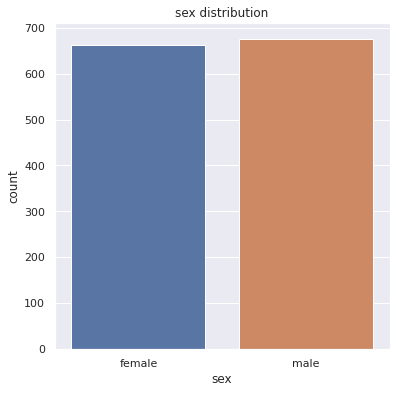

In [44]:
#(Count plot for categorical features)
#Gender Column
plt.figure(figsize(6,6))
sns.countplot(x='sex',data=df)
plt.title('sex distribution')
plt.show()

In [45]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


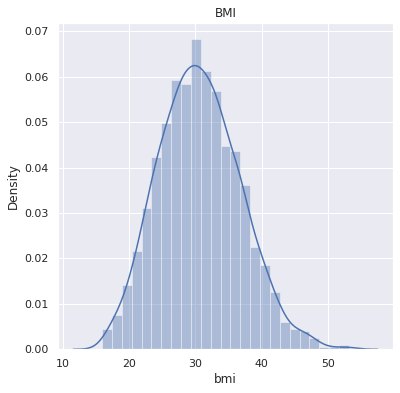

In [46]:
#Distribution of bmi value
#(Distribution plot)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI')
plt.show()

Normal BMI range 18.5 to 24.9

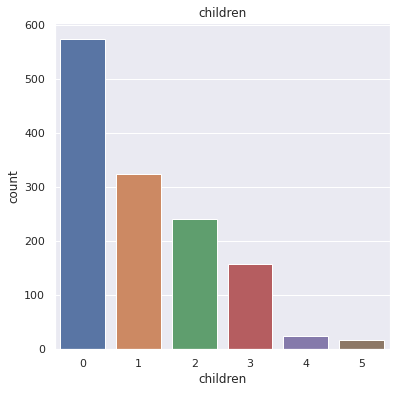

In [47]:
#(Count plot for categorical features)
#Children Column
plt.figure(figsize(6,6))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [48]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

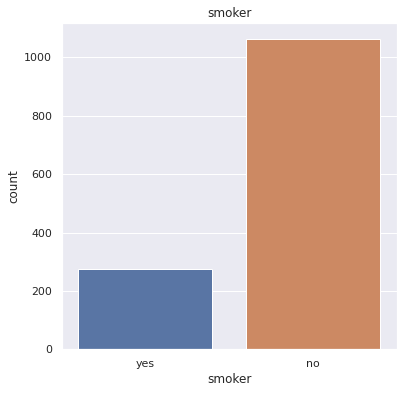

In [49]:
#(Count plot for categorical features)
#Smoker Column
plt.figure(figsize(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

In [50]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [51]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

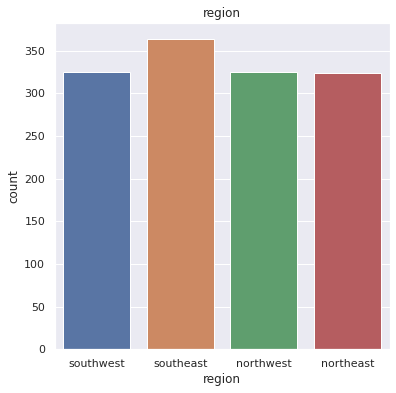

In [53]:
plt.figure(figsize(6,6))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


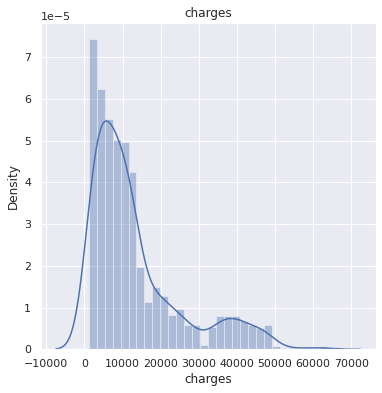

In [54]:
#Distribution of age value
#(Distribution plot)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges')
plt.show()

Data Preprocessing
1.encoding the categorical features

In [57]:
#encoding the sex column
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['sex'] = lab.fit_transform(df['sex'])
df['region'] = lab.fit_transform(df['region'])
df['smoker'] = lab.fit_transform(df['smoker'])


In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [59]:
#Splitting the features and target
X=df.drop(columns='charges',axis=1)
y=df['charges']

In [61]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [62]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [63]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
X_train

,age,sex,bmi,children,smoker,region
882,21,0,22.135,0,0,0
505,37,1,30.875,3,0,1
798,58,0,33.100,0,0,3
792,22,0,23.180,0,0,0
201,48,0,32.230,1,0,2
...,...,...,...,...,...,...
466,60,0,28.700,1,0,3
299,48,0,28.880,1,0,1
493,61,1,43.400,0,0,3
527,51,0,25.800,1,0,3


In [65]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training


In [68]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [69]:
reg.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [74]:
#Prediction on training data
y_pred_training=reg.predict(X_train)

In [75]:
from sklearn import metrics
r2_train=metrics.r2_score(y_train,y_pred_training)
print('R sq value',r2_train)

R sq value 0.7519923667088932


In [77]:
#Prediction on training data
y_pred_test=reg.predict(X_test)
r2_train=metrics.r2_score(y_test,y_pred_test)
print('R sq value',r2_train)

R sq value 0.7445422986536503


Building Predictive System


In [94]:
#input_data=(31,female,25.74,0,no,southeast)
import numpy as np
input_data=(31,0,0,25.74,0,3)
input_data_as_np_array=np.asarray(input_data)
input_data_reshaped=input_data_as_np_array.reshape(1,-1)
pred=reg.predict(input_data_reshaped)
print(pred)
print('The insurance cost is:', pred[0])


[10236.39270438]
The insurance cost is: 10236.392704378832


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
